In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Restaurant_Reviews.csv')
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


## Data Exploration and Cleaning

In [3]:
cleaned_data = data.copy()


In [4]:
cleaned_data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
cleaned_data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [6]:
cleaned_data.isna().any()

Review    False
Liked     False
dtype: bool

In [7]:
cleaned_data['Review'].sample(10)

369                                 He deserves 5 stars.
206    I've lived here since 1979 and this was the fi...
887                After 20 minutes wait, I got a table.
187                                   Interesting decor.
143    And the red curry had so much bamboo shoots an...
770    My sashimi was poor quality being soggy and ta...
274          The chefs were friendly and did a good job.
387    This place deserves one star and 90% has to do...
651    Great place to relax and have an awesome burge...
658                    It was just not a fun experience.
Name: Review, dtype: object

In [8]:
cleaned_data['Review'].iloc[999]

"Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."

In [9]:
import contractions
import re
import nltk
import keras
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

stemmer = PorterStemmer(mode='NLTK_EXTENSIONS')
stop_words = stopwords.words('english') 
stop_words.remove('not')

tokenizer = keras.preprocessing.text.Tokenizer()

def fix_contractions(text):
    return contractions.fix(text)


def remove_punctuations(text):
    return re.sub('[^a-zA-Z]', ' ', text)

def convert_to_lower(text):
    return text.lower()
 
def remove_stopwords(text):
    return  ' '.join(word for word in text.split() if word not in stop_words) 



def preprocess(text):
    text = fix_contractions(text)
    text = remove_punctuations(text)
    text = convert_to_lower(text)
    text = remove_stopwords(text)
    return text

cleaned_data['Review'] = cleaned_data['Review'].apply(preprocess)

In [10]:
cleaned_data['Review']

0                                        wow loved place
1                                         crust not good
2                                not tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                            selection menu great prices
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997              overall not impressed would not go back
998    whole experience underwhelming think go ninja ...
999    not wasted enough life poured salt wound drawi...
Name: Review, Length: 1000, dtype: object

## Feature Engineering

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [12]:
vectorized_data = vectorizer.fit_transform(cleaned_data['Review']).toarray()
vectorized_data.shape

(1000, 1883)

In [13]:
vectorizer.vocabulary_

{'wow': 1863,
 'loved': 958,
 'place': 1225,
 'crust': 376,
 'not': 1101,
 'good': 699,
 'tasty': 1647,
 'texture': 1660,
 'nasty': 1076,
 'stopped': 1586,
 'late': 903,
 'may': 999,
 'bank': 102,
 'holiday': 790,
 'rick': 1381,
 'steve': 1578,
 'recommendation': 1338,
 'selection': 1452,
 'menu': 1021,
 'great': 713,
 'prices': 1269,
 'getting': 681,
 'angry': 34,
 'want': 1801,
 'damn': 387,
 'pho': 1211,
 'honeslty': 793,
 'taste': 1643,
 'fresh': 650,
 'potatoes': 1257,
 'like': 929,
 'rubber': 1398,
 'could': 345,
 'tell': 1652,
 'made': 973,
 'ahead': 16,
 'time': 1683,
 'kept': 881,
 'warmer': 1805,
 'fries': 656,
 'touch': 1705,
 'service': 1465,
 'prompt': 1281,
 'would': 1861,
 'go': 692,
 'back': 93,
 'cashier': 246,
 'care': 237,
 'ever': 545,
 'say': 1430,
 'still': 1580,
 'ended': 525,
 'wayyy': 1818,
 'overpriced': 1151,
 'tried': 1718,
 'cape': 233,
 'cod': 299,
 'ravoli': 1321,
 'chicken': 271,
 'cranberry': 361,
 'mmmm': 1044,
 'disgusted': 454,
 'pretty': 1266,
 'sur

## Model Creation and Evaluation

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectorized_data, cleaned_data['Liked'], test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score

sgd = SGDClassifier()
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)


In [16]:
precision_score(y_true=y_test,
                y_pred=y_pred)

0.8571428571428571

In [17]:
recall_score(y_true=y_test,
             y_pred=y_pred)

0.75

Adjusting the threshold of the classifier will give you more control over the precision and recall values of the classifier.

### Visualizing the Threshold

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(estimator=sgd,
                                X=X_train,
                                y=y_train,
                                cv=3,
                                method='decision_function')

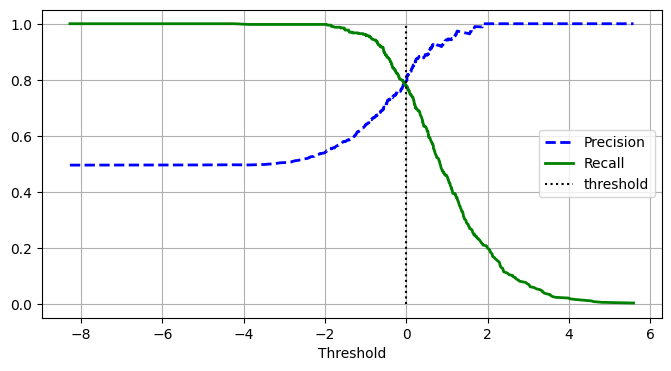

In [19]:
precisions, recalls, thresholds = precision_recall_curve(y_train, predictions)

threshold_ = 0
plt.figure(figsize=(8, 4)) 
plt.grid()
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold_, 0, 1.0, "k", "dotted", label="threshold")
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()



Let's adjust the threshold to achieve a recall of about 90%.

In [20]:
recall_at_90_index = (recalls <= 0.9).argmax() # <= is used instead of >= since the recall values are in descending order.

recall_90_threshold = thresholds[recall_at_90_index]

In [21]:
predictions_at_90_recall = (predictions >= recall_90_threshold).astype(int)


recall_score(y_true=y_train,
             y_pred=predictions_at_90_recall).round(2)

0.9

In [22]:
precision_score(y_true=y_train,
                y_pred=predictions_at_90_recall).round(2)

0.7

We have succesfully adjusted our threshold to give us about 90% recall but at the cost of a reduced precision since there's a tradeoff between precision and recall, as can be noted from the plot above.

### Evaluation using Precision Recall Curve

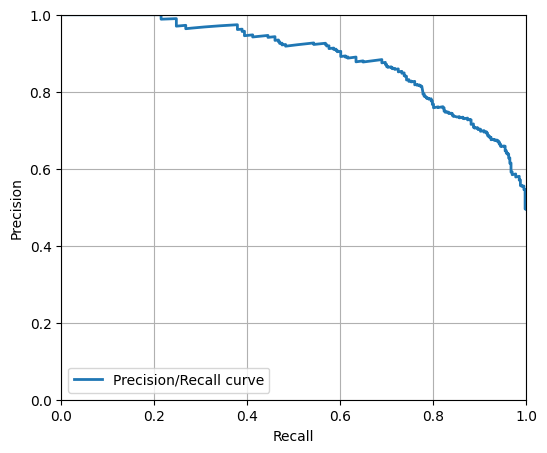

In [23]:
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()